# Classification

# Setup

In [1]:
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
np.random.seed(42)

# MNIST

Datasets in sklearn have a dictionary structure, including the following:
- *DESCR* describing the dataset
- *data* containing an array with one row per instance and one column per feature
- *target* contaning an array with the labels

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist['target_names']

['class']

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

In [6]:
# y is an array of 70K labels
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
# X has 70K rows with 784 columns each (784=28*28 pixels).
# Each feature represents a pixel's intensity from 0 (white) to (255) black (usually in CV is the opposite).
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

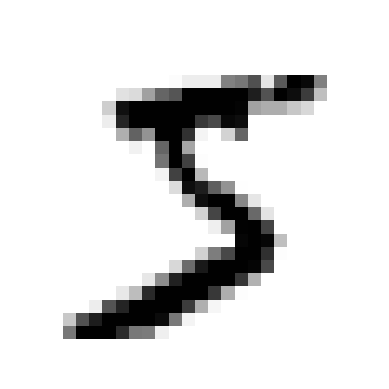

In [8]:
# Display a digit using matplotlib
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [9]:
# Note that the value of y are labels (strings)
y[0]

'5'

In [10]:
# Most ML algorithms expect numbers so let's convert y to numeric values
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [11]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [12]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

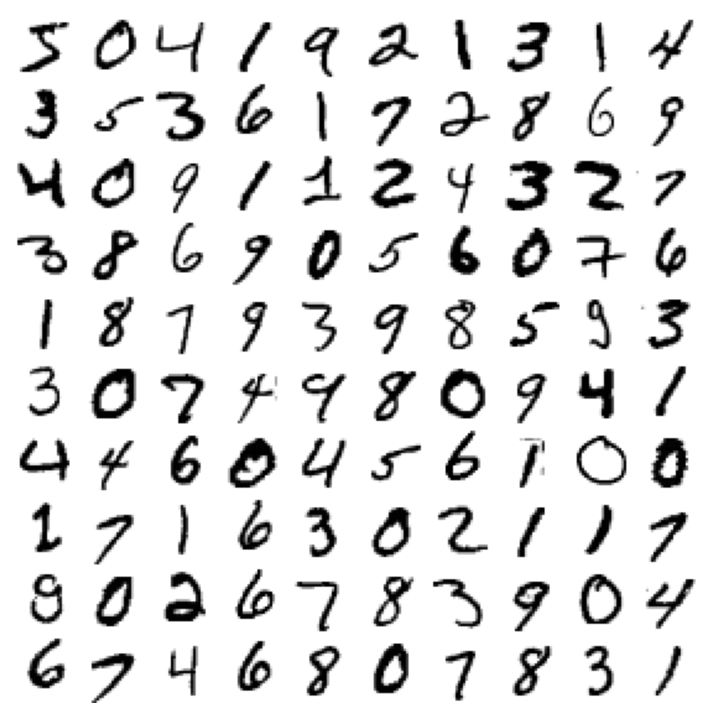

In [13]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

In [14]:
# MNIST is traditionally divided in train and test sets in the following way:
# Use first 60K as training data and the last 10K as test data 
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

For illustration purposes we will train a binary classifier to recognize 5's (label 1 if the digit is 5, label 0 if is not 5).

In [15]:
# Define the binary label to classify 5's
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [16]:
y_train_5

array([ True, False, False, ...,  True, False, False])

Let's pick a simple classifier from sklearn. SGDClassifier implements a Stochastic Gradient Descent algorithm that can be used for linear classifiers (more on that later), by default it fits a linear Support Vector Machine with Hinge loss function.

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Now we can use the model to detect images of the number 5.

In [18]:
sgd_clf.predict([some_digit])

array([ True])

In [19]:
sgd_clf.predict([X[10]])

array([False])

Let's evaluate the Accuracy (more on classification metrics later) on the training set. Accuracy is just the number of correctly classified divided by all examples in the set being evaluated.

In [20]:
# Accuracy of the train set
y_hat_train_5 = sgd_clf.predict(X_train)
y_hat_train_5

array([ True, False, False, ...,  True, False, False])

In [21]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [22]:
correct = sum(y_hat_train_5 == y_train_5)
total = len(y_train_5)
correct, total

(np.int64(57136), 60000)

In [23]:
accuracy = correct / total
accuracy

np.float64(0.9522666666666667)

In [24]:
sum(y_train_5)

np.int64(5421)

In [25]:
# Another way
np.mean(y_hat_train_5 == y_train_5)

np.float64(0.9522666666666667)

In [26]:
# With sklearn metrics
from sklearn.metrics import accuracy_score
accuracy_score(y_train_5, y_hat_train_5)

0.9522666666666667

In [27]:
# Directly from the model
sgd_clf.score(X_train, y_train_5)

0.9522666666666667

Now, let's do the same with the test set.

In [28]:
y_hat_test_5 = sgd_clf.predict(X_test)
accuracy_score(y_test_5, y_hat_test_5)

0.9492

In [29]:
sgd_clf.score(X_test, y_test_5)

0.9492

# Performance Measures

## Cross-validation

In [30]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
cv_scores

array([0.95035, 0.96035, 0.9604 ])

In [31]:
# Just as an example let's what a Stratified KFold looks
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


### Accuracy's shortcomings

Our model has a very good accuracy, however before we get too excited let's use a very dumb classifier that just classifies every single image as a negative example (not-5 class)

In [32]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [33]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

We got more than 90\% accuracy. Why is the case?

## Confusion Matrix

From a cross validated model we can get the predictions made on the training set with the function *cross_val_predict*, and then, get the corresponding confusion matrix.

In [34]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [35]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [36]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

Note that in Scikit-learn one row of a confusion matrix represents a *true* class, while each column represents a *predicted* class.

**Remember:** In a Confusion Matrix the terms "True Positives", "True Negatives", "False Positives" and "False Negatives" are just labels that helps us to understand the concepts and the ways to compute the different metrics associated. But the classes could be labeled and positioned in different ways inside the matrix for convenience.

In this case, the first row of this matrix represents the negative class (label 0), and the second row represent the positive class (label 1), so the first row contains the *True Negatives* and the *False Negatives*, while the second row contains the *False Posiives* and the *True Positives*.

**Accuracy:** We can compute the accuracy with the values from a confusion matrix in the following way:

$$ Accuracy = \frac{TP + TN}{TP + FP + TN + FN} $$

A perfect classifier would have only TP and TN values in the main diagonal and zero in other places, so it would have an accuracy of 1.0 or 100\%.

Let's compute the accuracy from the confusion matrix generated before.

In [37]:
accuracy = sum(np.diag(cm)) / np.sum(cm)
accuracy

np.float64(0.9570333333333333)

Now, let's compare this value with the average of the cross validated scores computed during model's training.

In [38]:
np.mean(cv_scores)

np.float64(0.9570333333333334)

## Precision and Recall

In [39]:
from sklearn.metrics import precision_score, recall_score

In [40]:
precision_score(y_train_5, y_train_pred)

np.float64(0.8370879772350012)

In [41]:
recall_score(y_train_5, y_train_pred)

np.float64(0.6511713705958311)

Use the confusion matrix generated before to compute precision and recall

In [42]:
cm

array([[53892,   687],
       [ 1891,  3530]])

In [43]:
# Remember that in a confusion matrix from Scikit-Learn:
# Rows represent actual classes
# Columns represent predicted classes
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [44]:
TP / (TP + FP)

np.float64(0.8370879772350012)

In [45]:
TP / (TP + FN)

np.float64(0.6511713705958311)

Now, the 5 detector doesn't look so sexy as it did when you looked at accuracy. 

When it claims it is a 5 it's only correct 83.7\% of the time, and only detect correctly 65.1\% of the real 5's.

The bulk of the accuracy was propelled by predicting the majority class of No-5.

### Precision/Recall Trade-off

To analyze the precision/recall trade-off, we will look at how the model make its classification decisions. For each instance, it computes a score based on a decision function. If the score is greater than a threshold, it predicts the positive label, otherwise it predicts the negative label.

Scikit-learn doesn't let you set a threshold directly to the *predict* function, however we can use the *decision_function* method of the SGDClassifier. This method gives you confidence scores for the samples, that you can manually compare against any threshold you want.

In [46]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [47]:
# Using threshold=0 give you the same predictions as the *predict* method of the classifier
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [48]:
# If we increase the threshold we may get a different result
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image is really a 5 and this is predicted with threshold=0, but is missed with threshold=8000.

How to know which threshold is the better one?

Let's use cross validation with the decision function instead of accuracy.

In [49]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

With these scores at hand, the function *precision_recall_curve* helps us to get precision and recall for all possible thresholds and plot them as functions of the threshold value.

In [50]:
from sklearn.metrics import precision_recall_curve

In [51]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [52]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
precisions, recalls, thresholds

(array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]),
 array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
          38871.26391927,   42216.05562787,   49441.43765905]))

In [53]:
len(precisions)

60001

In [54]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])

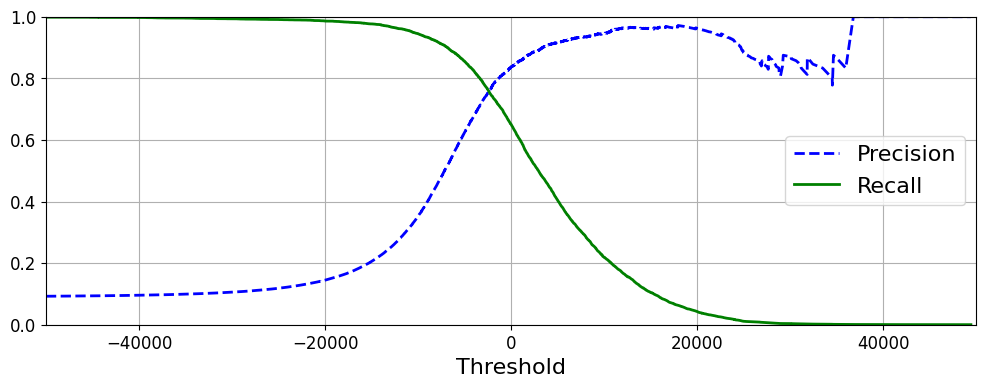

In [55]:
plt.figure(figsize=(12, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

You can notice that a threshold=0 gives you the 0.837 precision and the 0.651 recall from before.

One question arise, why precision is bumpy while recall is smooth?

**Exercise:** Try computing precision and recall for all intermediate thresholds between digits in the figure on page 17 of the slides and generate a graph similar to the one above.

### Aiming for a specific metric

If you want to aim for a specific precision, lets say 0.9 you can search for the lower threshold that gives you at least that figure.

In [56]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
recall_90_precision, threshold_90_precision

(np.float64(0.4799852425751706), np.float64(3370.0194991439557))

Let's plot again, now with the specific threshold for the required precision.

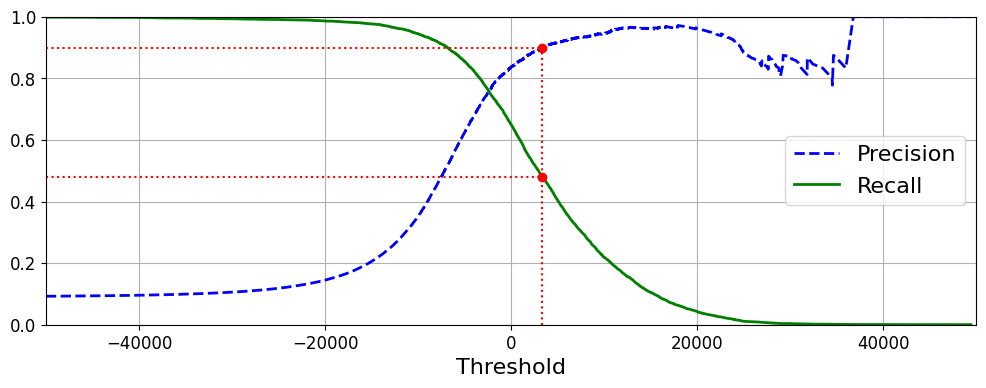

In [57]:
plt.figure(figsize=(12, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

**Exercise:** Let's say you want to get at least 90\% of the real 5's classified as 5 (90\% recall), without caring too much about missclassifying other digits as 5 (that's acceptable for you given that you retrieve at least 90\% of the real 5's). How would you find the threshold you need?

In [58]:
# Your code
precision_90_recall = precisions[np.argmax(recalls <= 0.90)]
threshold_90_recall = thresholds[np.argmax(recalls <= 0.90)]
precision_90_recall, threshold_90_recall

(np.float64(0.5160266582037448), np.float64(-6861.032537940254))

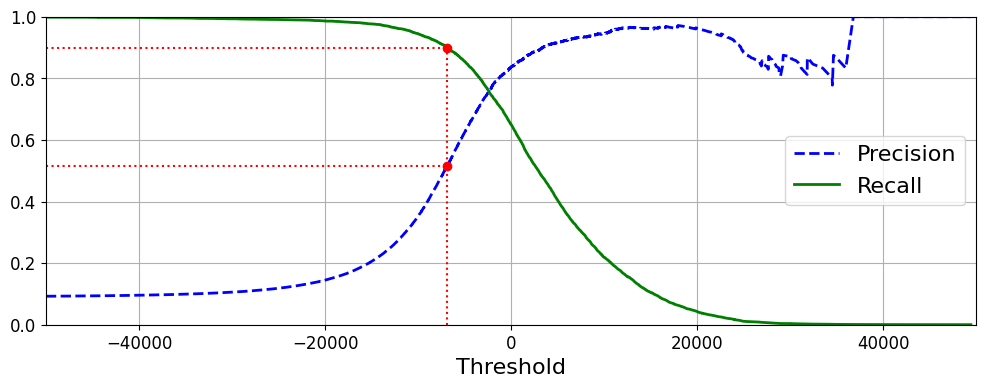

In [59]:
plt.figure(figsize=(12, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_recall, threshold_90_recall], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_recall], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_recall], [precision_90_recall, precision_90_recall], "r:")
plt.plot([threshold_90_recall], [0.9], "ro")
plt.plot([threshold_90_recall], [precision_90_recall], "ro")
plt.show()

### Precision-recall curve

Another way to select a good precision/recall trade-off is to plot precision directly against recall. This is known as the precision-recall curve.

In [60]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

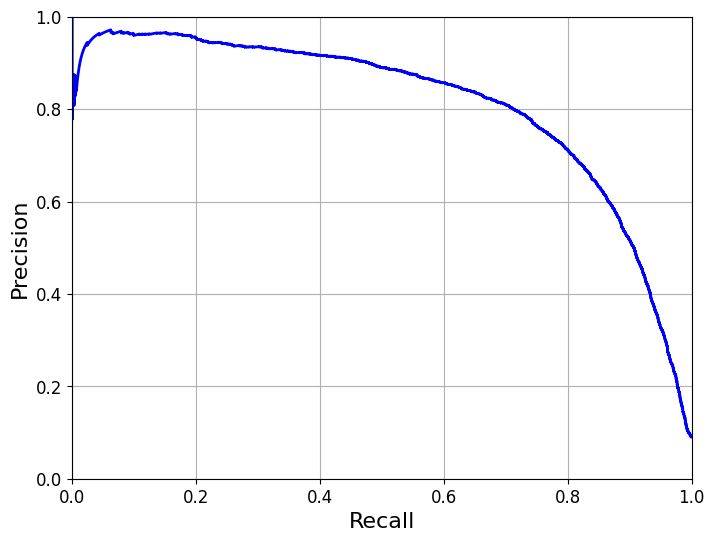

In [61]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

Let's plot again considering a 90\% of precision as requirement.

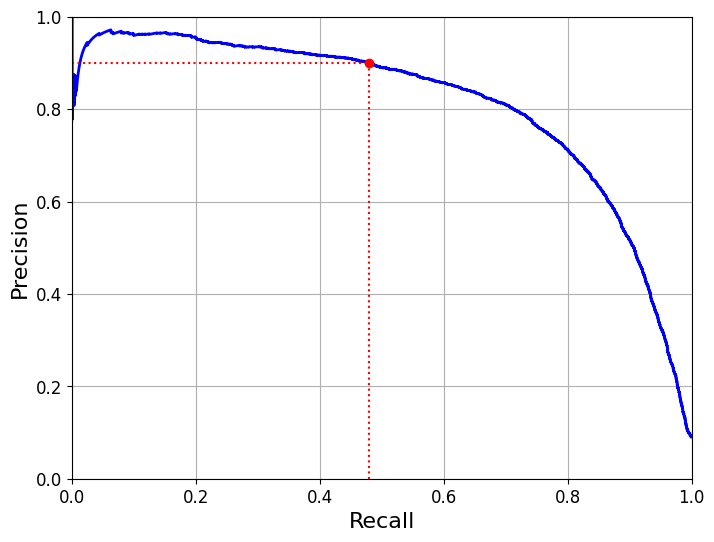

In [62]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

Again, the way to select a threshold depends on the needs of your project, and if you value more precision or recall. For example, we can try to find a good balance if we find the closest point of the blue line to the upper-right corner of the plot (the point of a perfect classifier with 1.0 precision and 1.0 recall).

## $F_1$ Score

In [63]:
from sklearn.metrics import f1_score

In [64]:
f1_score(y_train_5, y_train_pred)

np.float64(0.7325171197343847)

In [65]:
precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)
precision, recall

(np.float64(0.8370879772350012), np.float64(0.6511713705958311))

In [66]:
2 * precision * recall / (precision + recall)

np.float64(0.7325171197343846)

In [67]:
TP, FP, FN

(np.int64(3530), np.int64(687), np.int64(1891))

In [68]:
TP / (TP + (FN + FP) / 2)

np.float64(0.7325171197343847)

## $F_\beta$ score

In [69]:
from sklearn.metrics import fbeta_score

In [70]:
beta = 2
fbeta_score(y_train_5, y_train_pred, beta=beta)

np.float64(0.6814408710088413)

In [71]:
(1 + beta ** 2) * precision * recall / (beta ** 2 * precision + recall) 

np.float64(0.6814408710088414)

In [72]:
(1 + beta ** 2) * TP / ((1 + beta ** 2) * TP + beta ** 2 * FN + FP)

np.float64(0.6814408710088413)

In [73]:
beta = 0.5
fbeta_score(y_train_5, y_train_pred, beta=beta)

np.float64(0.7918704293597739)

In [74]:
(1 + beta ** 2) * precision * recall / (beta ** 2 * precision + recall) 

np.float64(0.7918704293597739)

In [75]:
(1 + beta ** 2) * TP / ((1 + beta ** 2) * TP + beta ** 2 * FN + FP)

np.float64(0.7918704293597739)

Remember this classifier has a higher precision than recall, so it makes sense that $F_{0.5}$ is greater than $F_2$, because remember that $\beta=2$ put more weight into recall and $\beta=0.5$ put more weight into precision.

Lastly we should mention that $\beta=1$, as you can imagine, corresponds to the previously seen $F_1$ score.

## ROC Curve

Another common tool used with binary classifiers.

In [76]:
from sklearn.metrics import roc_curve

In [77]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
        1.        ]),
 array([0.00000000e+00, 1.84467810e-04, 9.22339052e-04, ...,
        9.99815532e-01, 1.00000000e+00, 1.00000000e+00]),
 array([             inf,   49441.43765905,   36801.60697028, ...,
        -105763.22240074, -106527.45300471, -146348.56726174]))

In [78]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

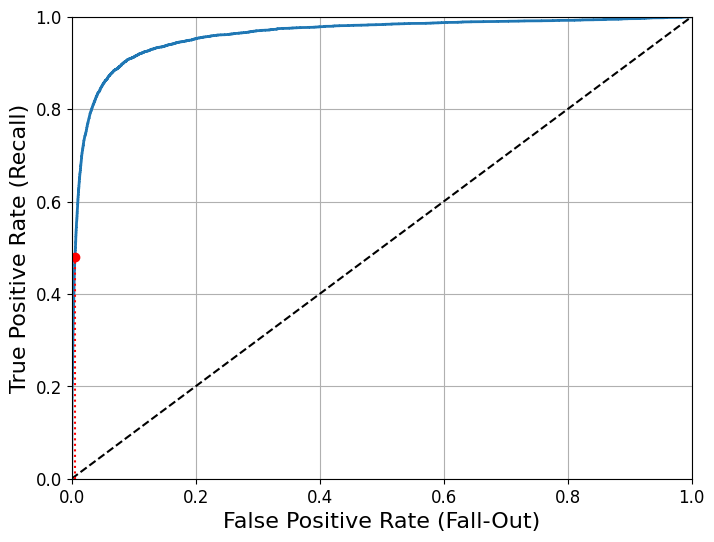

In [79]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.show()

The red dot marks the classifier at the threshold for a 90\% precision computed before (48\% recall).

### ROC AUC

To compare different classifiers we can measure the *area under the curve* (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

In [80]:
from sklearn.metrics import roc_auc_score

In [81]:
roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

Now, let's train a random forest classifier (more on that later) and compare it with the previous one.

The random forest classifier from Scikit-learn doesn't have a decision function, instead it gives you predicted probabilities for each class. It returns a row per instance and a column per class.

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

First column of *y_probas_forest* corresponds to the predicted probability of the negative class (No-5), and second column corresponds to the predicted probability of the positive class (5).

In [84]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [85]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]
recall_for_forest

np.float64(0.9511160302527208)

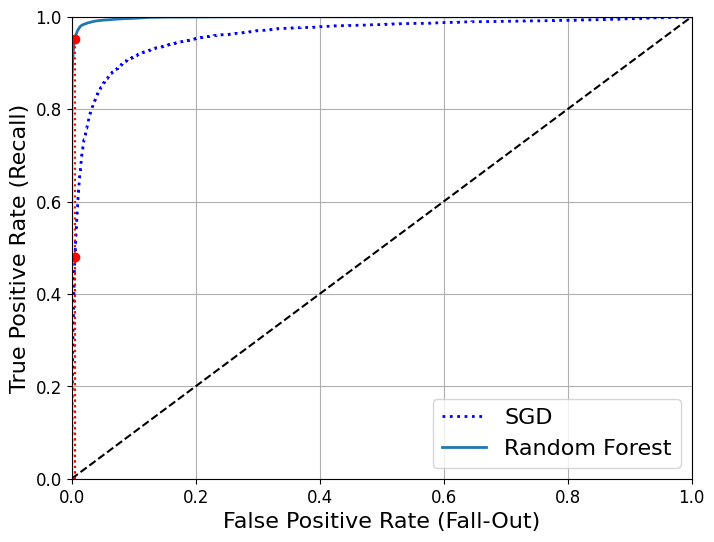

In [86]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

It can be seen that the RandomForestClassifier's ROC curve looks better than the one from SGDClassifier. Let's compute it's AUC.

In [87]:
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9983436731328145)

Let's get the predicted classed instead or the probabilities, to compute precision and recall of this model.

In [88]:
y_train_pred_forest = y_probas_forest[:,1] > y_probas_forest[:,0]
y_train_pred_forest

array([ True, False, False, ...,  True, False, False])

In [89]:
precision_score(y_train_5, y_train_pred_forest)

np.float64(0.9905083315756169)

In [90]:
recall_score(y_train_5, y_train_pred_forest)

np.float64(0.8662608374838591)

Well, this is much better than the previous classifier.

## Assignment 3-01

A)
Follow a similar process to the one shown for the number 5 to build a classifier for even numbers.
- 0, 2, 4, 6, 8 should be positive labels
- 1, 3, 5, 7, 9 should be negative labels

B) 
Implement a k-fold cross validation function that receives as argument the following:
- model: This should be a model object that contains at least two methods: fit and predict (any sklearn model should have those).
- X: The matrix with the input training data with one row per example and one column per feature
- y: The vector with training data labels (values or clases)
- k: The number of folds in which the training data will be divided
- metric: A function to compute the evaluation of your model
- shuffle: (default as False) A boolean indicating if you should shuffle the data before splitting or not

To keep it "simple", for the time being we should not worry about stratification of unbalanced classes.

This function should be able to return the scores and the predictions of the samples when they are being used as validation set (not training).

C)
Use your implementation of cross validation to get the predictions and build the confusion matrix and compute accuracy, precision, recall and $F_1$ scores.

D)
Plot the Precision/Recall curve and the ROC curve.

E)
Finally, decide which threshold you would use and explain why.

In [91]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold

# Convert labels to classify even numbers
y_train_even = np.isin(y_train.astype(int), [0, 2, 4, 6, 8])
y_test_even = np.isin(y_test.astype(int), [0, 2, 4, 6, 8])

# Train an SGD classifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_even)

SGDClassifier(random_state=42)

In [92]:
def KFoldCV(model, X, y, k=5, metric=precision_score, shuffle=False):
    kf = KFold(n_splits=k, shuffle=shuffle, random_state=42 if shuffle else None)
    scores = []
    predictions = np.zeros(len(y))
    
    for train_index, val_index in kf.split(X):
        X_train_folds, X_val_fold = X[train_index], X[val_index]
        y_train_folds, y_val_fold = y[train_index], y[val_index]
        
        model.fit(X_train_folds, y_train_folds)
        y_pred = model.predict(X_val_fold)
        
        predictions[val_index] = y_pred
        scores.append(metric(y_val_fold, y_pred))
    
    return scores, predictions

# Perform cross-validation
scores, y_train_pred = KFoldCV(sgd_clf, X_train, y_train_even)

In [93]:
# Compute metrics
cm = confusion_matrix(y_train_even, y_train_pred)
precision = precision_score(y_train_even, y_train_pred)
recall = recall_score(y_train_even, y_train_pred)
f1 = f1_score(y_train_even, y_train_pred)

print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
 [[24561  5947]
 [ 3217 26275]]
Precision: 0.8154366581838496
Recall: 0.8909195714091958
F1 Score: 0.8515085717989435


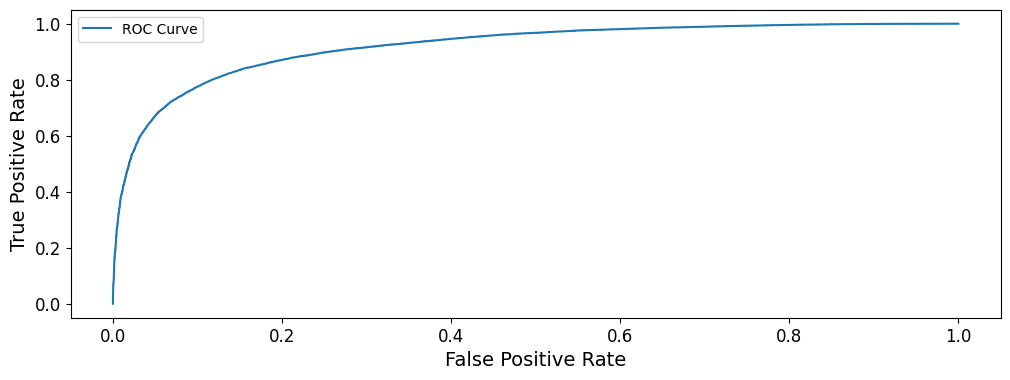

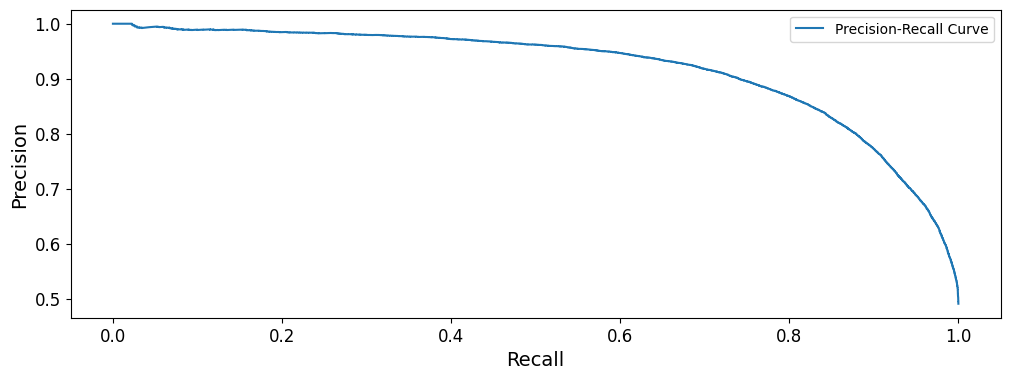

In [94]:
# ROC and Precision-Recall curves
y_scores = cross_val_predict(sgd_clf, X_train, y_train_even, cv=3, method="decision_function")
fpr, tpr, _ = roc_curve(y_train_even, y_scores)
precisions, recalls, _ = precision_recall_curve(y_train_even, y_scores)

plt.figure(figsize=(12, 4))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(recalls, precisions, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

## Conclusion

In this analysis, an **SGDClassifier** was trained using the MNIST dataset to classify digits as even or odd. After performing **k-fold cross-validation** with k=5 and calculating the relevant metrics, the results obtained are as follows:

- **Confusion Matrix**:
  - True Positives (correctly classified even digits): 26,275
  - False Negatives (even digits misclassified as odd): 3,217
  - False Positives (odd digits misclassified as even): 5,947
  - True Negatives (correctly classified odd digits): 24,561

- **Key Metrics**:
  - **Precision**: 0.815
  - **Recall**: 0.891
  - **F1 Score**: 0.851

These metrics indicate **good performance** of the classifier, with high ability to detect even digits (recall) and good precision in correctly classifying the even digits. The **F1 Score** of 0.851 reflects a **strong balance** between precision and recall.

- **Performance Curves**:
  - **ROC Curve**: Shows strong performance with an **AUC close to 1**, indicating low false positive rate and high true positive rate.
  - **Precision-Recall Curve**: Indicates that the model maintains **high precision** even as recall increases, making it suitable for applications where false positives should be minimized.

### **Overall Conclusion**:
The trained model performs well and is suitable for binary classification tasks such as detecting even digits. However, improvements can be explored by **hyperparameter optimization**, trying different **models**, or **class balancing** to further increase the classifier's accuracy. Additionally, normalizing the data could have a positive impact on performance.


## Author(s):
* Caballero Coll Alejandro
* Chiquete Ayala Paulina
* Dominguez Jaber T. Estefania
* Monroy Minero Diego